In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt7 = "Simulate 1ZNI for 1 ns at a temperature of 300 K in water. \
    Then, simulate it again in acetonitrile. Compute the RMSD, final secondary structure, and PCA for each simulation. "
llm_var = "gpt-4o-2024-08-06"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools,ckpt_dir='ckpt_26')
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-26
time: 09:07:35
LLM:  gpt-4o-2024-08-06 
Temperature:  0.1


Thought: To address the question, I need to perform two separate simulations of the protein 1ZNI: one in water and another in acetonitrile. After each simulation, I will compute the RMSD, final secondary structure, and PCA. I will start by downloading the PDB file for 1ZNI.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1ZNI"
  }
}
```PDB file found with this ID: 1ZNI
Thought: Now that I have the PDB file for 1ZNI, I will set up and run the first simulation in water. I will use the appropriate force field and simulation parameters for a 1 ns simulation at 300 K. After completing the simulation in water, I will proceed with the simulation in acetonitrile.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI_090742",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1.0 * nanometers",
      "constraints": 

[11:33:40] SMILES Parse Error: syntax error while parsing: acetonitrile
[11:33:40] SMILES Parse Error: Failed parsing SMILES 'acetonitrile' for input: 'acetonitrile'


finished writing pdb file
To proceed with the simulation of 1ZNI in acetonitrile, I will use the newly created PDB file for acetonitrile. I will set up the simulation using this PDB file along with the protein 1ZNI. After completing the simulation, I will compute the RMSD, final secondary structure, and PCA for each simulation. Let's set up and run the simulation in acetonitrile.

Action:
```json
{
  "action": "packmol_tool",
  "action_input": {
    "pdbfiles_id": ["1ZNI_090750"],
    "small_molecules": ["acetonitrile"],
    "number_of_molecules": [1, 1000],
    "instructions": [
      ["fixed 0. 0. 0. 0. 0. 0. centerofmass"],
      ["inside box 0. 0. 0. 90. 90. 90."]
    ]
  }
}
```Starting Packmol Tool!
Small molecules PDBs created successfully
Packing: Packed Structures of the following molecules:
Molecule ID: 1ZNI_090750, Number of Molecules: 1
Molecule ID: acetonitrile, Number of Molecules: 1000 
The file name is: 1_1ZNI_090750_and_1000_acetonitrile_v1.pdb
[!] Line 1 is short: 1 <

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

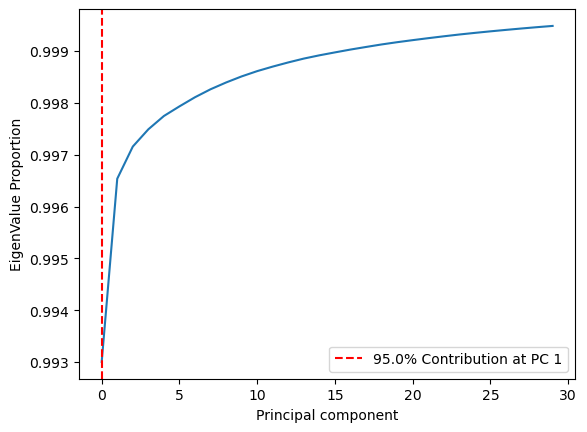

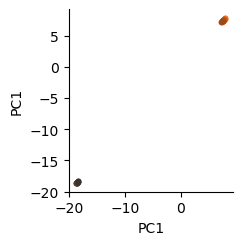

In [3]:
agent.run(prompt7)

In [ ]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

In [ ]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

In [7]:
assert os.path.exists(registry.ckpt_dir + registry.get_mapped_path("1ZNI_110113").split("ckpt_26")[1]), "Checkpoint file not found"
assert os.path.exists(registry.ckpt_dir + registry.get_mapped_path("top_sim0_110125").split("ckpt_26")[1]), "Checkpoint file not found"
assert os.path.exists(registry.ckpt_dir + registry.get_mapped_path("rec0_110127").split("ckpt_26")[1]), "Checkpoint file not found"

# Experiment Result:
### Completed without Exception or TimeOut Errors ❌
### Attempted all necessary steps ✅
### No Hallucinations ✅ 
### Logic make sense ✅
### Correct Answer  ❌
### Number of steps completed: 6
### % steps completed: 60%